<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** The basic unit which comprises neural networks. Every neuron has 2+ inputs with trainable weights, an overall bias, and a single output.
- **Input Layer:** The first layer of a neural network, which must match the dimensionality of the incoming data.
- **Hidden Layer:** A layer of neurons unseen by input or output. Does not have to match up with input or output dimensionality.
- **Output Layer:** The final layer. In binary classification problems, its dimension is 1, whereas in multi-class problems, its dimension must match the number of classes.
- **Activation Function:** The function which calculates the output of each neuron given the weighted, biased inputs. An example is "Relu" (rectified linear unit) which looks like y=x with the bottom chopped off.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

*Back-propagation is when information from the output function gets sent back to alllll these grapes (pointing to massive spread of grapes on table, each one representing a neuron) and tells them how to adjust their juiciness to reach maximum output juice. This happens thousands of times until each grape is contributing just the right amount.*

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

*The simplest perceptron takes two inputs, which are first scaled by the weights learned during training. These weighted values are then both added to a single bias value, and finally plugged into the activation function, which spits out the single output.*

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [3]:
X.shape

(300, 2)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
model1 = Sequential()

model1.add(Dense(1, activation='sigmoid', input_dim=2))

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

h1 = model1.fit(
    X, y,
    epochs=100
)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7658 - accuracy: 0.4367
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7636 - accuracy: 0.4367
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.4367
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7596 - accuracy: 0.4367
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7578 - accuracy: 0.4333
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7559 - accuracy: 0.4333
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.4333
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7523 - accuracy: 0.4367
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7507 - accuracy: 0.4400
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7489 - accuracy: 0.4400
Epoch 11/

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [16]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .999):   
            self.model.stop_training = True

In [21]:
model2 = Sequential()

model2.add(Dense(32, activation='relu', input_dim=2))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

h2 = model2.fit(
    X, y,
    epochs=100,
    callbacks=[myCallback()]
)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5833
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6300
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7600
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.8567
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.8800
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.8867
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.8933
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.9067
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.9200
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.9233
Epoch 11/

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [ ]:
!pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


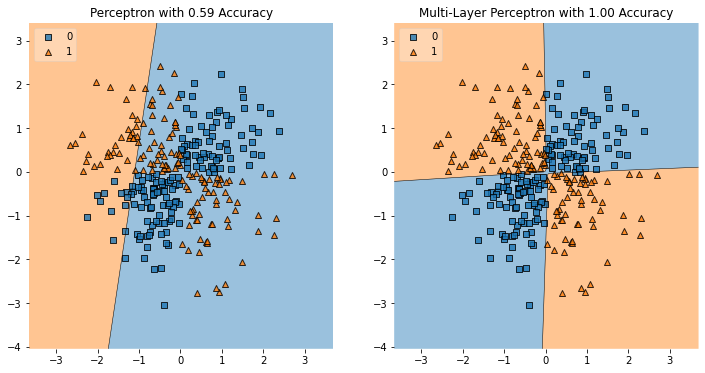

In [22]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

*The single perceptron only has one neuron, and can thus only distinguish linearly separated classes. As seen in the graphs above, all the perceptron can do is divide the plot along one well-chosen line. Multi-layer networks allow multi-dimensional division of features. This is necessary for complex data such as images, where features are rarely defined along straight lines!*

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1


In [28]:
# Split data into features and target, and check baseline.

X = df.drop(columns='target')
y = df['target']
y.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [30]:
# Scale features.

scaler = StandardScaler()
XT = scaler.fit_transform(X)

In [39]:
# Split into training and validation data.

XT_train, XT_val, y_train, y_val = train_test_split(XT, y, test_size=42, random_state=42)

In [40]:
XT_train.shape

(261, 13)

In [58]:
# Callbacks

from IPython import display

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    display.clear_output(wait = True)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

In [53]:
# Basic model, no tuning.

def build():
    model = Sequential()

    model.add(Dense(128, activation='relu', input_dim=13))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build()

h = model.fit(
    XT_train, y_train,
    epochs=50,
    validation_data=(XT_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6168 - accuracy: 0.7050 - val_loss: 0.4713 - val_accuracy: 0.8333
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.8314 - val_loss: 0.3829 - val_accuracy: 0.8095
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3966 - accuracy: 0.8506 - val_loss: 0.3444 - val_accuracy: 0.8095
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8621 - val_loss: 0.3285 - val_accuracy: 0.8095
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8697 - val_loss: 0.3269 - val_accuracy: 0.8095
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3235 - accuracy: 0.8812 - val_loss: 0.3313 - val_accuracy: 0.8333
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.8697 - val_loss: 0.3447 - val_accuracy: 0.8333
Epoch 8/50
9/9 [=================

In [54]:
model.evaluate(XT_val, y_val)

2/2 [==============================] - 0s 3ms/step - loss: 0.3424 - accuracy: 0.8810


[0.34239572286605835, 0.8809523582458496]

*Val accuracy (no tuning) - .881*

In [ ]:
!pip install keras-tuner

In [75]:
# Using kerastuner to tune *number of units*, *activation function*,
# and *optimizer*.

import kerastuner as kt

def build(hp):
    hp_units = hp.Int('units', 64, 256, 32)
    hp_act = hp.Choice('activation', ['relu', 'elu', 'selu'])
    hp_opt = hp.Choice('optimizer', ['adam', 'nadam'])

    model = Sequential()

    model.add(Dense(hp_units, activation=hp_act, input_dim=13))
    model.add(Dropout(.3))
    model.add(Dense(hp_units, activation=hp_act))
    model.add(Dropout(.3))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp_opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.BayesianOptimization(
    build,
    objective = 'val_accuracy', 
    max_trials = 30,
    directory = 'my_dir',
    project_name = 'tune3'
)

tuner.search(
    XT_train, y_train,
    epochs=10,
    validation_data=(XT_val, y_val),
    callbacks=[ClearTrainingOutput()]
)

Trial 30 Complete [00h 00m 01s]
val_accuracy: 0.9047619104385376

Best val_accuracy So Far: 0.9285714030265808
Total elapsed time: 00h 01m 01s
INFO:tensorflow:Oracle triggered exit


*With tuning, I was able to get **.9285** val accuracy. That's significantly better than the basic model!*

In [76]:
# Results summary of best 10 trials

tuner.results_summary()

Results summary
Results in my_dir/tune3
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: nadam
Score: 0.9285714030265808
Trial summary
Hyperparameters:
units: 192
activation: selu
optimizer: nadam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: relu
optimizer: nadam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: adam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: nadam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: nadam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: nadam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: nadam
Score: 0.9047619104385376
Trial summary
Hyperparameters:
units: 256
activation: selu
optimizer: nada